Displaying the distinct categories of resume -
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']

Displaying the distinct categories of resume and the number of records belonging to each category - 
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
ETL Developer                40
Operations Manager           40
Blockchain                   40
Sales                        40
Mechanical Engineer          40
Data Science                 40
Arts                         36
Databa

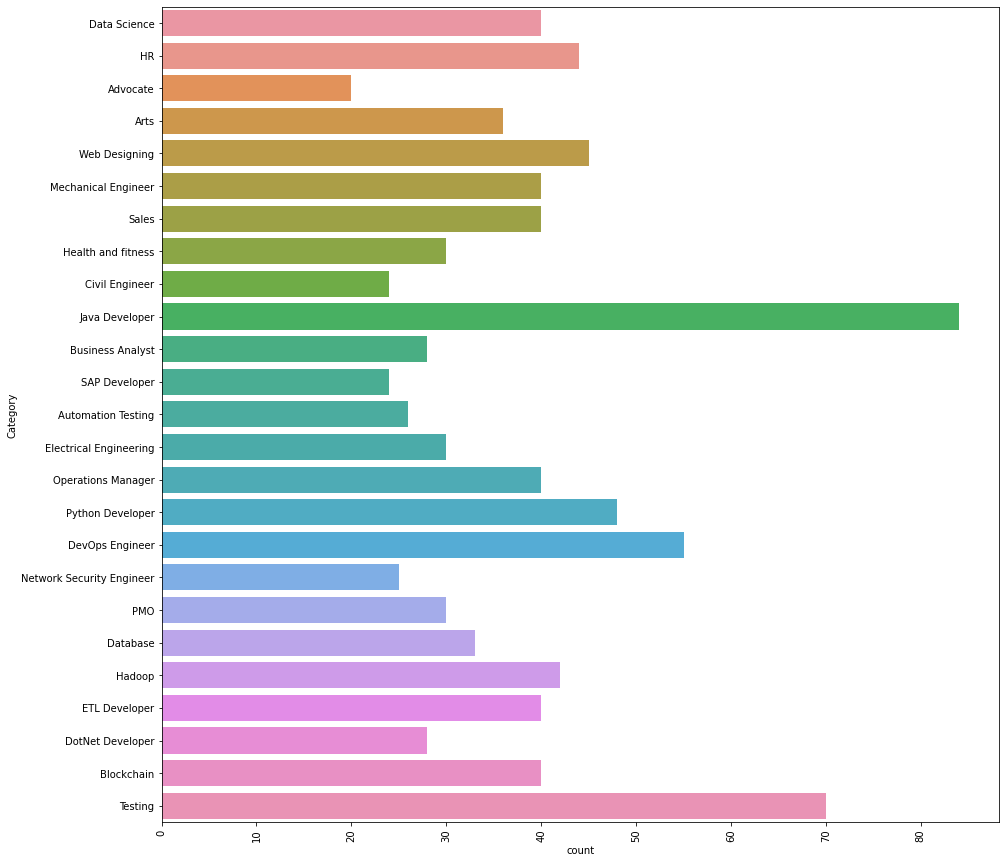

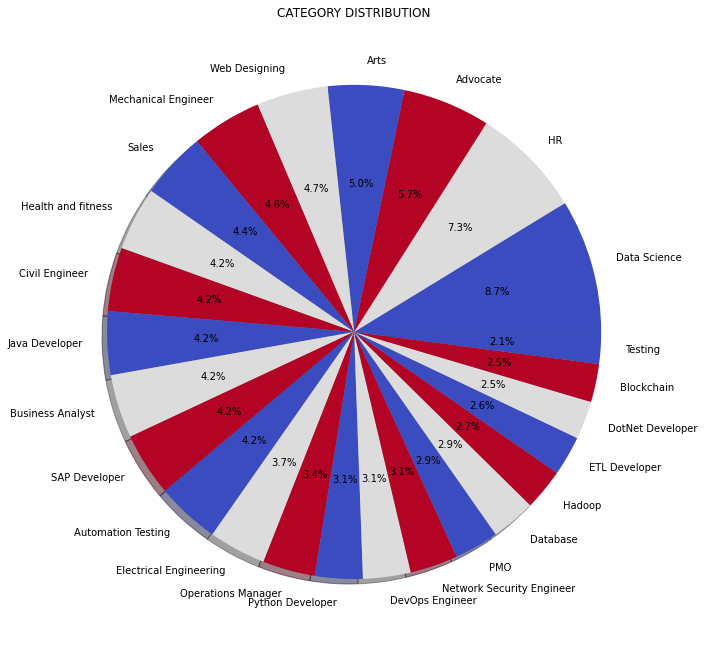

[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


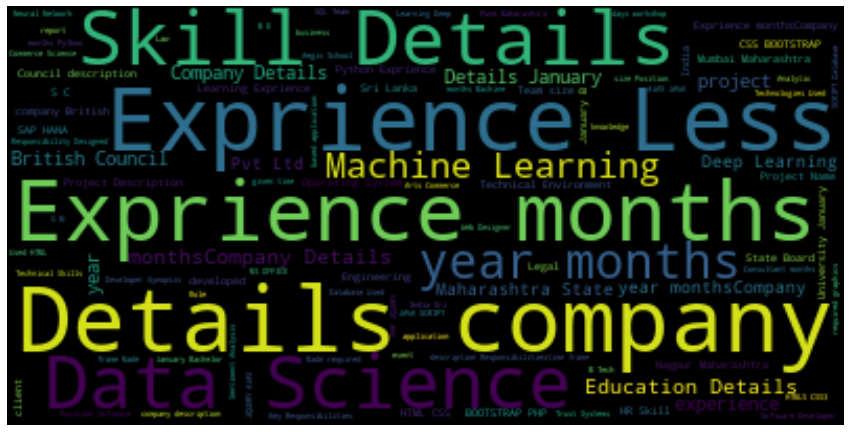

Feature completed! Training and Testing Shape Shown Below!
(481, 1500)
(481, 1500)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from tkinter import Label, Tk
import re
import nltk
#nltk.download('all')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

resumeDataSet = pd.read_csv('Resume Dataset (Assignment).csv' ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

#Extra Irrelevant Code (Data Visualization)

print ("Displaying the distinct categories of resume -")
print (resumeDataSet['Category'].unique())

print ("\nDisplaying the distinct categories of resume and the number of records belonging to each category - ")
print (resumeDataSet['Category'].value_counts())

#import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataSet)
plt.show()


#from matplotlib.gridspec import GridSpec
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

#Creation of a helper function to remove the URLs, hashtags, mentions, special letters, and punctuations.
#import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))



#import nltk
#nltk.download('all')
#from nltk.corpus import stopwords
#import string
#from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

#Representing the data occurrence frequency on WordCloud
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

#Converting the formed words into categorical values
#from sklearn.preprocessing import LabelEncoder
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])


    
# Splitting Data into training and test sets
#from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import TfidfVectorizer
#from scipy.sparse import hstack
requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed! Training and Testing Shape Shown Below!")
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.5)
print(X_train.shape)
print(X_test.shape)

#Training the Model for the Classification Report

#from sklearn.metrics import accuracy_score
############ model 1 - KNeighboursClassifier - KNN ##################
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
t1 = clf.score(X_train, y_train)
t2 = clf.score(X_test, y_test)
t3 = metrics.classification_report(y_test, prediction)
t1_final = "Accuracy of KNeighbors Classifier on training set: {:.2f}".format(t1)
t2_final = "Accuracy of KNeighbors Classifier on test set: {:.2f}".format(t2)
t3_final = "\n Classification report for classifier %s:\n%s\n" % (clf, (t3))

################### Model 2 Logistic Regression ###################     
#from sklearn.linear_model import LogisticRegression  
clf_lr= LogisticRegression(random_state=0)  
clf_lr.fit(X_train, y_train)
prediction_lr = clf_lr.predict(X_test)
lr1 = clf_lr.score(X_train, y_train)
lr2 = accuracy_score(y_test,prediction_lr)
lr1_final = "Accuracy of Logistic Regression on training set: {:.2f}".format(lr1)
lr2_final = "Accuracy of Logistic Regression on test set: {:.2f}".format(lr2)

################### Model 3 Decision Tree ###################     
#from sklearn.tree import DecisionTreeClassifier  
classifier_dt= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier_dt.fit(X_train, y_train)  
prediction_dt = clf_lr.predict(X_test)
dt1 = clf_lr.score(X_train, y_train)
dt2 = accuracy_score(y_test,prediction_dt)
dt1_final = "Accuracy of Decision Tree on training set: {:.2f}".format(dt1)
dt2_final = "Accuracy of Decision Tree on test set: {:.2f}".format(dt2)

window = Tk()
window.title("Result")
window.geometry("1200x800")
window.configure(bg = "white")
window.resizable(False, False)

t1_label = Label(window, bg="black", fg="red", font=("Times", 10, "bold"), relief="flat")
t1_label.place(x=20, y=20)
t1_label.configure(text= t1_final)

t2_label = Label(window, bg="black", fg="red", font=("Times", 10, "bold"), relief="flat")
t2_label.place(x=20, y=40)
t2_label.configure(text= t2_final)

t3_label = Label(window, bg="black", fg="red", font=("Times", 10, "bold"), relief="flat")
t3_label.place(x=20, y=80)
t3_label.configure(text= t3_final)

lr1_label = Label(window, bg="black", fg="red", font=("Times", 10, "bold"), relief="flat")
lr1_label.place(x=500, y=10)
lr1_label.configure(text= lr1_final)

lr1_label = Label(window, bg="black", fg="red", font=("Times", 10, "bold"), relief="flat")
lr1_label.place(x=500, y=30)
lr1_label.configure(text= lr2_final)

dt1_label = Label(window, bg="black", fg="red", font=("Times", 10, "bold"), relief="flat")
dt1_label.place(x=850, y=10)
dt1_label.configure(text= dt1_final)

dt2_label = Label(window, bg="black", fg="red", font=("Times", 10, "bold"), relief="flat")
dt2_label.place(x=850, y=30)
dt2_label.configure(text= dt2_final)



window.mainloop()